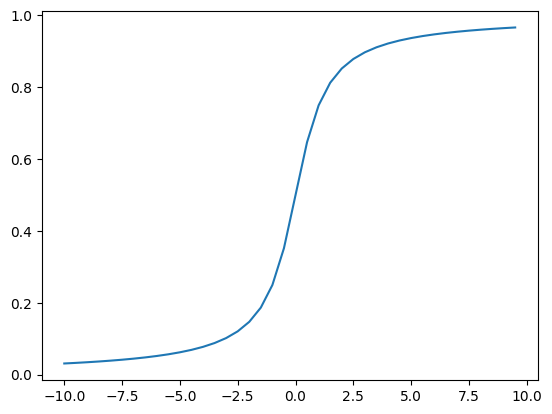

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10, 0.5)
y = (np.arctan(x) + np.pi / 2) / np.pi
plt.plot(x, y)


In [38]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from os import getenv

load_dotenv()

CSV_RS = getenv("CSV_RS")
CSV = f"{CSV_RS}/online_retail_listing.csv"

df = pd.read_csv(CSV, sep=";", encoding="cp1251")
# print(df.isnull().sum())

# df[ df["Customer ID"].isna() ].count()

# df.isnull().sum()

# https://www.kaggle.com/datasets/ilkeryildiz/online-retail-listing/data
# https://docs.google.com/forms/d/e/1FAIpQLSeihi8Ygrby0y_VeXirFr3vEWjeRSX8ENcps8iFuPmJQu8q4A/viewform


In [45]:
df.sum()

KeyboardInterrupt: 

In [ ]:
df.count()

In [25]:
# do we need to drop empty customers?
df = df.dropna(subset=["Customer ID"])

In [34]:
# df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d.%m.%Y %H:%M")
df["Price"] = df["Price"].replace(",", ".", regex=True)

for num_col in ("Price", "Quantity"):
    df[num_col] = df[num_col].replace(",", ".", regex=True)
    df[num_col] = pd.to_numeric(df[num_col])

# for num_col in df.select_dtypes(include=["number"]).columns:


# df["Price"] = df["Price"].replace(",", ".", regex=True)



In [37]:
df = df[df["Invoice"].astype(str).str.startswith("C")]

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2011-12-02 15:10:00,4.95,12668.0,Germany
1046567,C580313,22419,LIPSTICK PEN RED,-6,2011-12-02 15:10:00,0.42,12668.0,Germany
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2011-12-02 15:10:00,2.55,12668.0,Germany
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2011-12-02 15:10:00,1.25,12668.0,Germany


In [17]:
df = df[
    ( pd.to_numeric(df["Quantity"]) > 0 )
    & ( pd.to_numeric(df["Price"]) > 0 )
]